# Basic MLP NN with MNIST

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11419648/11490434 [============================>.] - ETA: 0s

In [3]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


## Understanding the image data format

In [5]:
X_train[0].shape

(28, 28)

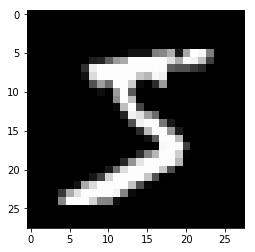

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
y_train[0]

5

## Preprocessing the image data

In [8]:
image_height, image_width = 28, 28

In [9]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [11]:
X_train /= 255.0
X_test /= 255.0

In [12]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
# 10 different bins (0~9 number)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [14]:
model = Sequential()

In [15]:
# 512 nodes and RELU as activation function

model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
# dense_1: +512 is adding bias
784*512 + 512

401920

In [21]:
# dense_2
512*512+512

262656

In [22]:
# dense_3
512*10+10

5130

## Train the model

In [23]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s - loss: 0.1835 - acc: 0.9433 - val_loss: 0.0955 - val_acc: 0.9708
Epoch 2/20
60000/60000 [==============================] - 26s - loss: 0.0803 - acc: 0.9750 - val_loss: 0.0984 - val_acc: 0.9700
Epoch 3/20
60000/60000 [==============================] - 25s - loss: 0.0563 - acc: 0.9822 - val_loss: 0.0843 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 25s - loss: 0.0451 - acc: 0.9856 - val_loss: 0.0767 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 26s - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0812 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 27s - loss: 0.0308 - acc: 0.9902 - val_loss: 0.0921 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 28s - loss: 0.0264 - acc: 0.9911 - val_loss: 0.0900 - val_acc: 0.9806
Epoch 8/20
60000/60000 [==============================

## What is the accuracy of the model?

### Plot the accuracy of the training model

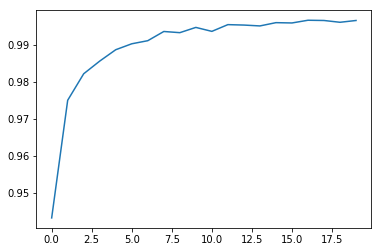

In [25]:
plt.plot(history.history['acc'])

### Plot the accuracy of training and validation set

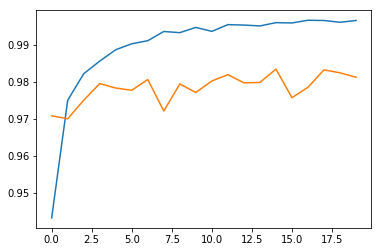

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Accuracy of training and validation with loss

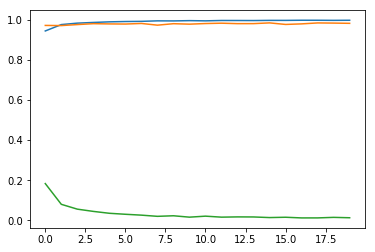

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

### Evaluating the model

In [28]:
score = model.evaluate(X_test,y_test)

 9600/10000 [===========================>..] - ETA: 0s

In [29]:
score

[0.11612686674798742, 0.9812]